In [1]:
import time
from matplotlib import pyplot as plt
import numpy as np
import pyvisa as visa
from tqdm import tqdm
import nidaqmx
import pandas as pd
import utils

In [ ]:
#%%
# inicializo comunicacion con equipos
rm = visa.ResourceManager()

# lista de dispositivos conectados, para ver las id de los equipos
print(rm.list_resources())

In [ ]:
func = rm.open_resource("GPIB0::1::INSTR")

In [2]:
#para saber el ID de la placa conectada (DevX)
system = nidaqmx.system.System.local()
for device in system.devices: 
    print(device)

with nidaqmx.Task() as task:
    ai_channel = task.ai_channels.add_ai_voltage_chan("Dev3/ai1",max_val=3,min_val=-3)
    print(ai_channel.ai_term_cfg)    
    print(ai_channel.ai_max)
    print(ai_channel.ai_min)

Device(name=Dev3)
TerminalConfiguration.DIFF
5.0
-5.0


In [ ]:
# configuramos una sinusoidal
func.write("FUNC 0") # 1 Cuadrada, 0 para el seno
# Seteamos el offset
offset = 1.2
func.write(f'OFFS {offset}')

# Seteamos la amplitud 
amp = 0.3
func.write(f'AMPL {amp} VP')

# func.write('OUTE1')
freq = 10
func.write(f'FREQ {freq}')

In [8]:
tiempo, V = utils.medir_continuo(duracion= 10, fs= 250000, max_iter = 1)

100%|██████████| 1/1 [00:11<00:00, 11.48s/it]


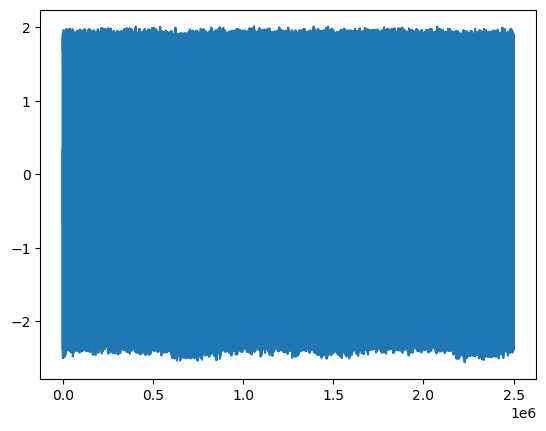

In [9]:
plt.plot(V)

In [ ]:
df = pd.DataFrame()

df["T"] = tiempo
df["V"] = V

df.to_csv("../mediciones/D.D/Medicion laser continua/prueba.csv")